<a href="https://colab.research.google.com/github/Hiji1023/dl_jacobian/blob/main/Logistic_Regression_1_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Logistic Regression (1 Feature)**##

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


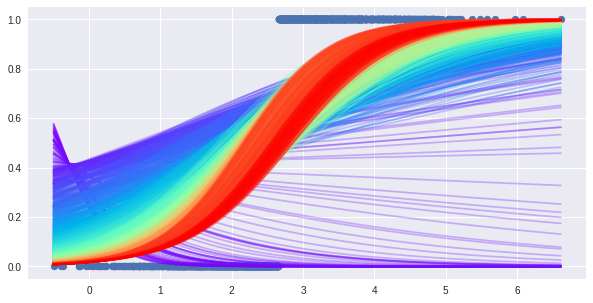

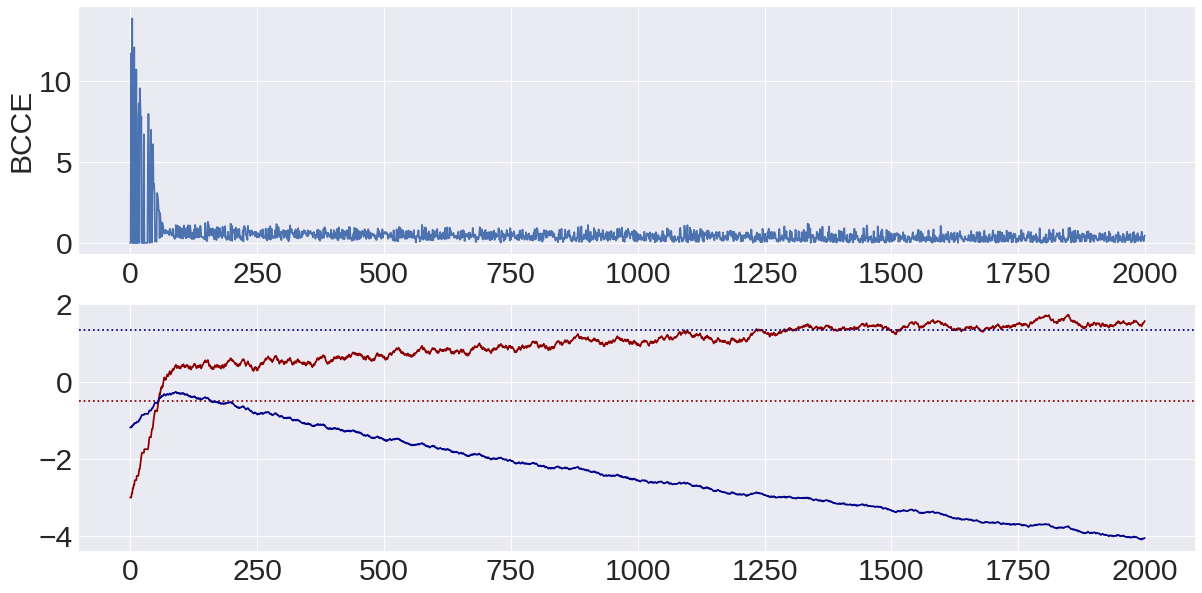

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N = 2000
lr = 0.03
# t_w, t_b가 어떻게 설정되었나에 따라 db가 바뀜
t_w = np.random.uniform(-3, 3, (1, ))
t_b = np.random.uniform(-3, 3, (1, ))

w = np.random.uniform(-3, 3, (1, ))
b = np.random.uniform(-3, 3, (1, ))

# # generate dataset
# x_data = np.random.randn(N, )
# y_data = x_data * t_w + t_b
# # sigmoid 통과
# y_data = 1/(1+np.exp(-y_data))
# y_data = (y_data > 0.5).astype(np.int)

# fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(x_data, y_data)

# generate dataset
db = -t_b/t_w
x_data = np.random.normal(db, 1, size=(N, ))
y_data = x_data * t_w + t_b
y_data = (x_data > db).astype(np.int)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x_data, y_data)

x_range = np.linspace(x_data.min(), x_data.max(), 100)
cmap = cm.get_cmap('rainbow', lut=N)
J_track = list()
w_track, b_track = list(), list()
for data_idx, (x,y) in enumerate(zip(x_data,y_data)):
  w_track.append(w)
  b_track.append(b)

  #visualize updated model
  y_range = w*x_range + b
  y_range = 1/(1 + np.exp(-y_range))
  ax.plot(x_range, y_range, color=cmap(data_idx), alpha = 0.3)

  # forward propagation
  z = x*w +b
  pred = 1/(1+np.exp(-z))
  J = -(y*np.log(pred)+(1-y)*np.log(1-pred))
  J_track.append(J)

  # jacobians
  dJ_dpred = (pred-y)/(pred*(1-pred))
  dpred_dz = pred*(1-pred)
  dz_dw = x
  dz_db = 1

  # backpropagation
  dJ_dz = dJ_dpred*dpred_dz
  dJ_dw = dJ_dz*dz_dw
  dJ_db = dJ_dz*dz_db

  #parameter update
  w = w - lr*dJ_dw
  b = b - lr*dJ_db

#visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("BCCE", fontsize=30)
axes[0].tick_params(labelsize=30)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=30)

# -b/w = 3의 비율을 유지하며 발산한다

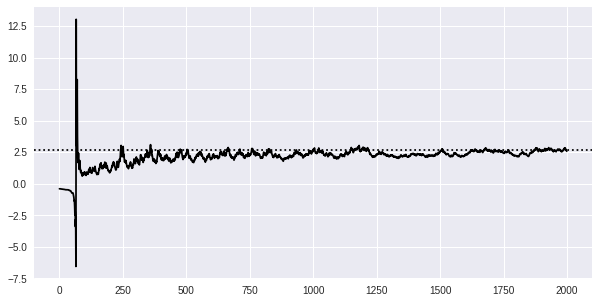

In [34]:
# 초기엔 왔다갔다 하지만 db를 유지하며 발산 -> step func에 가까워지도록 학습되어지고 있다
w_track = np.array(w_track)
b_track = np.array(b_track)

db_track = -b_track/w_track
db = -t_b/t_w

fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(y=db, color='black', linestyle=':')
ax.plot(db_track, color='black')